<a href="https://colab.research.google.com/github/jennabittner/ASTRON-5205/blob/main/Project1_Bittner_Holty_Eggenschwiler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
### Jenna Bittner, Nathan Holty, Hannah Eggenschwiler



# Imports

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac
from astropy.constants import G

In [ ]:
# Import csv file
tab = astropy.io.ascii.read('PS_2025.01.16_06.39.23.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Explore data

In [ ]:
# Print column names
print('Column names:')
print()
tab.colnames

Column names:



['pl_name',
 'hostname',
 'default_flag',
 'sy_snum',
 'sy_pnum',
 'discoverymethod',
 'disc_year',
 'disc_facility',
 'soltype',
 'pl_controv_flag',
 'pl_refname',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_orbsmaxlim',
 'pl_rade',
 'pl_radeerr1',
 'pl_radeerr2',
 'pl_radelim',
 'pl_radj',
 'pl_radjerr1',
 'pl_radjerr2',
 'pl_radjlim',
 'pl_bmasse',
 'pl_bmasseerr1',
 'pl_bmasseerr2',
 'pl_bmasselim',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'pl_bmassjlim',
 'pl_bmassprov',
 'pl_orbeccen',
 'pl_orbeccenerr1',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_insol',
 'pl_insolerr1',
 'pl_insolerr2',
 'pl_insollim',
 'pl_eqt',
 'pl_eqterr1',
 'pl_eqterr2',
 'pl_eqtlim',
 'ttv_flag',
 'st_refname',
 'st_spectype',
 'st_teff',
 'st_tefferr1',
 'st_tefferr2',
 'st_tefflim',
 'st_rad',
 'st_raderr1',
 'st_raderr2',
 'st_radlim',
 'st_mass',
 'st_masserr1',
 'st_masserr2',
 'st_masslim',
 'st_met',
 'st_me

In [ ]:
# Print discovery method
print('Discovery method:')
print()
np.unique(tab['discoverymethod'])

Discovery method:



<Column name='discoverymethod' dtype='str29' length=11>
                   Astrometry
              Disk Kinematics
    Eclipse Timing Variations
                      Imaging
                 Microlensing
Orbital Brightness Modulation
                Pulsar Timing
  Pulsation Timing Variations
              Radial Velocity
                      Transit
    Transit Timing Variations

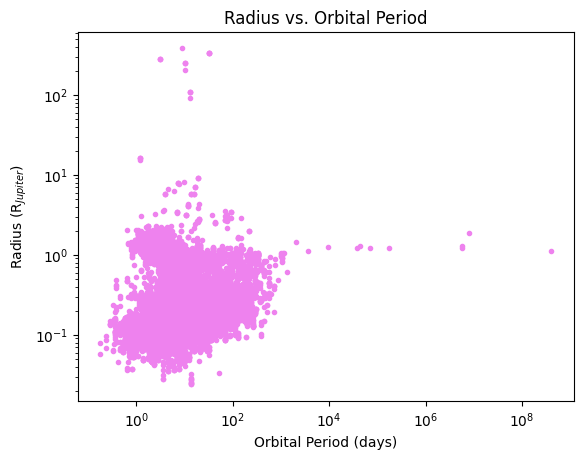

In [ ]:
# Plot radius against period
plt.plot(tab['pl_orbper'], tab['pl_radj'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Radius (R$_{Jupiter}$)')
plt.title('Radius vs. Orbital Period')
plt.show()

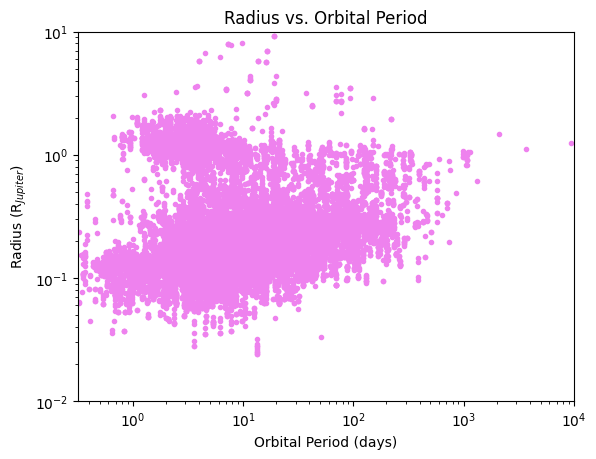

In [ ]:
## Only interested in short orbital periods

# Adjust range
plt.plot(tab['pl_orbper'], tab['pl_radj'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Radius (R$_{Jupiter}$)')
plt.title('Radius vs. Orbital Period')
plt.xlim(10**-0.5, 10**4)
plt.ylim(10**-2, 10**1)
plt.show()

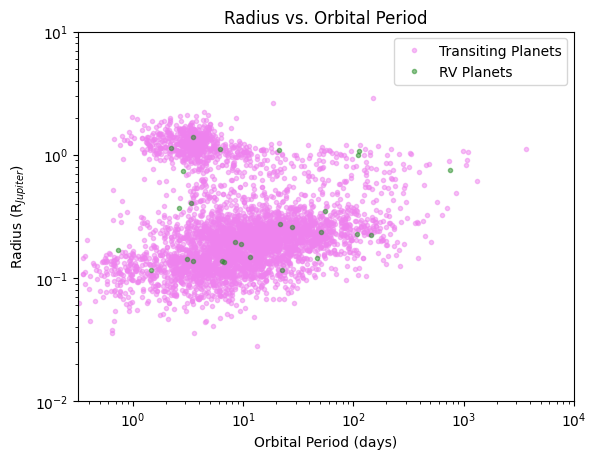

In [ ]:
from posixpath import altsep
## Remove multiple entries from same system

# Planets discovered via transit
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Transit'))
plt.plot(tab['pl_orbper'][ind], tab['pl_radj'][ind], '.', color='violet', label='Transiting Planets', alpha=0.5)

# Planets discovered via radial velocity
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Radial Velocity'))
plt.plot(tab['pl_orbper'][ind], tab['pl_radj'][ind], '.', color='forestgreen', label='RV Planets', alpha=0.5)

# Adjust plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Radius (R$_{Jupiter}$)')
plt.title('Radius vs. Orbital Period')
plt.xlim(10**-0.5, 10**4)
plt.ylim(10**-2, 10**1)
plt.legend()
plt.show()

In [ ]:
## Transit sensitivity equation

# Array of orbital periods ranging from 1 to 1000 days
p_arr = 10**np.arange(0, 3, 0.01) * u.day

# Total observation time
T = 1 * u.year  # 1 year

# Radius sensitivity
r_p_arr = np.sqrt(3 * np.sqrt(p_arr / T)) * u.earthRad

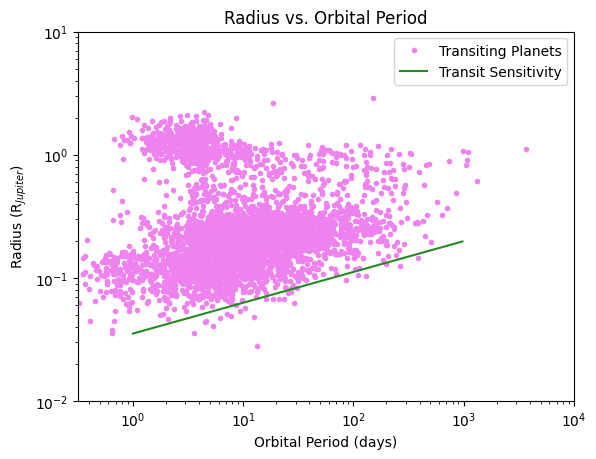

In [ ]:
# Transiting planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Transit'))

# Plot radius against orbital with transit sensitivity
plt.plot(tab['pl_orbper'][ind], tab['pl_radj'][ind], '.', color='violet', label='Transiting Planets')
plt.plot(p_arr.to(u.day).value, r_p_arr.to(u.jupiterRad).value, color='forestgreen', label='Transit Sensitivity')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Radius (R$_{Jupiter}$)')
plt.title('Radius vs. Orbital Period')
plt.xlim(10**-0.5, 10**4)
plt.ylim(10**-2, 10**1)
plt.legend()
plt.show()

# Question 1

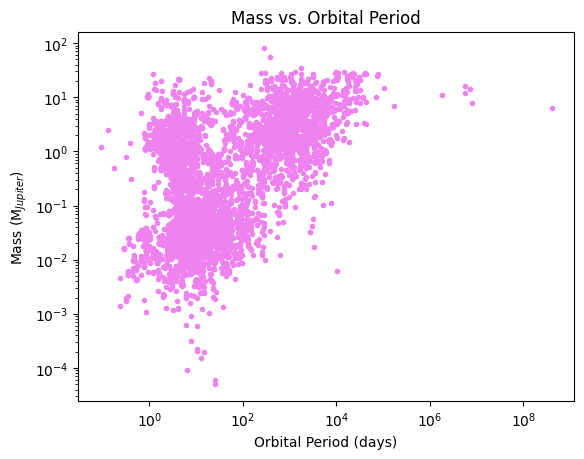

In [ ]:
## Mass vs period

# Plot
plt.plot(tab['pl_orbper'], tab['pl_bmassj'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Mass (M$_{Jupiter}$)')
plt.title('Mass vs. Orbital Period')
plt.show()

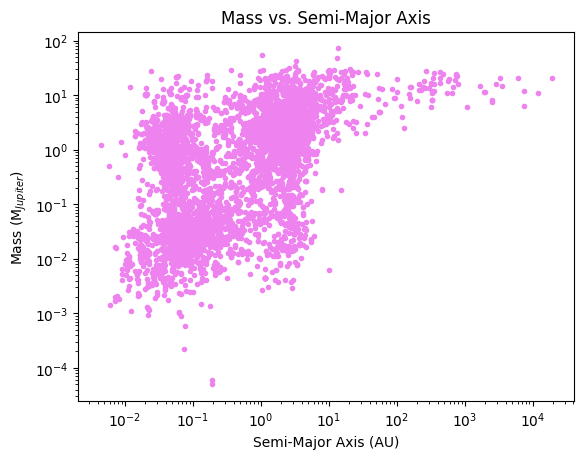

In [ ]:
## Mass vs semi-major axis

# Plot
plt.plot(tab['pl_orbsmax'], tab['pl_bmassj'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Jupiter}$)')
plt.title('Mass vs. Semi-Major Axis')
plt.show()

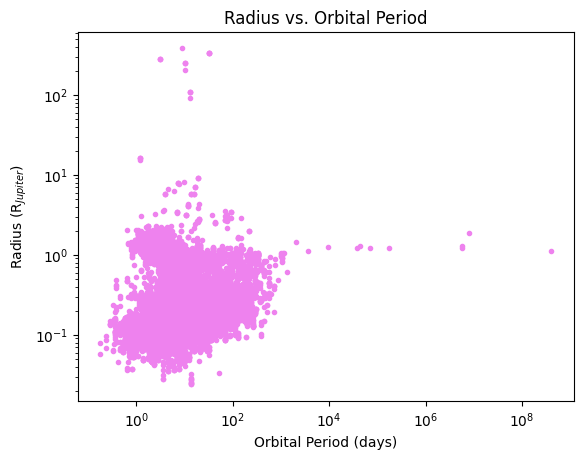

In [ ]:
## Radius vs period

# Plot
plt.plot(tab['pl_orbper'], tab['pl_radj'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Radius (R$_{Jupiter}$)')
plt.title('Radius vs. Orbital Period')
plt.show()

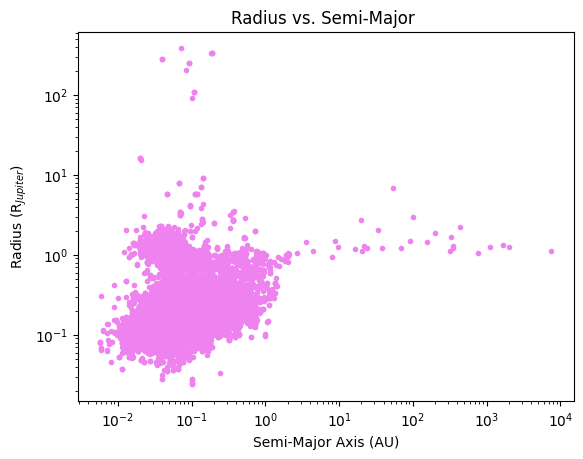

In [ ]:
## Radius vs semi-major

# Plot
plt.plot(tab['pl_orbsmax'], tab['pl_radj'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Radius (R$_{Jupiter}$)')
plt.title('Radius vs. Semi-Major ')
plt.show()

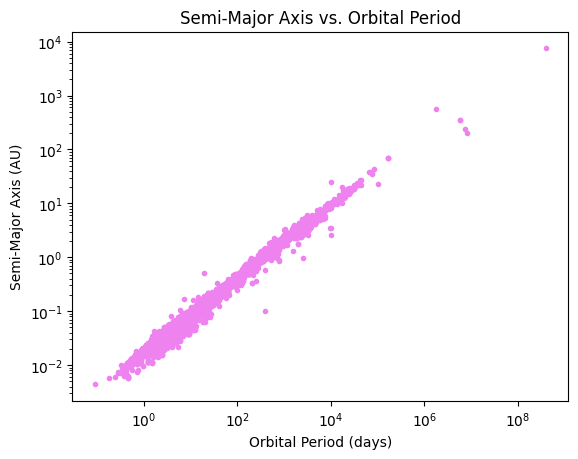

In [ ]:
## Semi-major vs period

# Plot semi-major axis against period
plt.plot(tab['pl_orbper'], tab['pl_orbsmax'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Semi-Major Axis (AU)')
plt.title('Semi-Major Axis vs. Orbital Period')
plt.show()

The plots of mass vs. orbital period and mass vs. semi-major axis are both very similar. The shape is nearly identical, with similar sparse areas. After looking at a plot fo semi-major axis vs. orbital period, it makes sense that graphs look similar because semi-major axis and orbital period are very heavily correlated. They are directly related because a greater/farther semi-major axis would result in a greater/longer orbital period. Therefore, plots of mass vs. period and mass vs. semi-major axis are expected to look very similar. The same can be said for the plots of radius vs. orbital period and radius vs. semi-major axis.

# Question 2

In [ ]:
## Overplot solar system planets

# Dictionary of solar system planetary data
ss_planet_data = {
    'Mercury': {'period': 88, 'radius': 0.0341, 'mass': 0.000174, 'color': 'grey'},
    'Venus': {'period': 224.7, 'radius': 0.1, 'mass': 0.003, 'color': 'orange'},
    'Earth': {'period': 365.2, 'radius': 0.1, 'mass': 0.003, 'color': 'green'},
    'Mars': {'period': 687, 'radius': 0.0532, 'mass': 0.02, 'color': 'red'},
    'Jupiter': {'period': 4331, 'radius': 1, 'mass': 1, 'color': 'brown'},
    'Saturn': {'period': 10747, 'radius': 0.85, 'mass': 0.299, 'color': 'yellow'},
    'Uranus': {'period': 30589, 'radius': 0.36, 'mass': 0.045, 'color': 'cyan'},
    'Neptune': {'period': 59800, 'radius': 0.35, 'mass': 0.054, 'color': 'blue'}
}

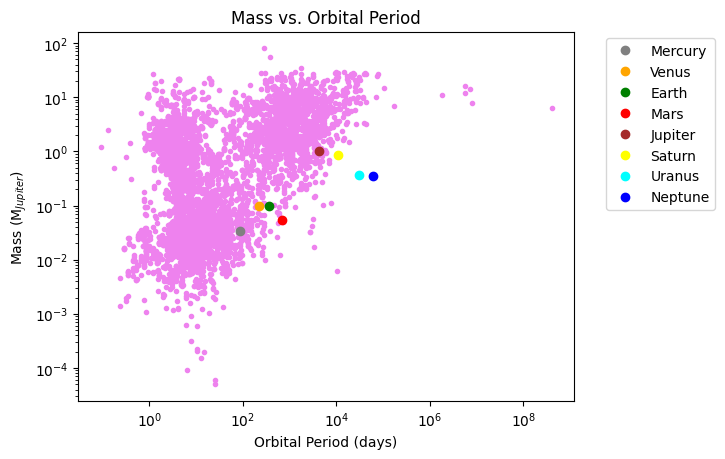

In [ ]:
# Mass against orbital period
plt.plot(tab['pl_orbper'], tab['pl_bmassj'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Mass (M$_{Jupiter}$)')
plt.title('Mass vs. Orbital Period')

# Plot solar system
for planet, data in ss_planet_data.items():
    plt.plot(data['period'], data['radius'], 'o', color=data['color'], label=planet)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

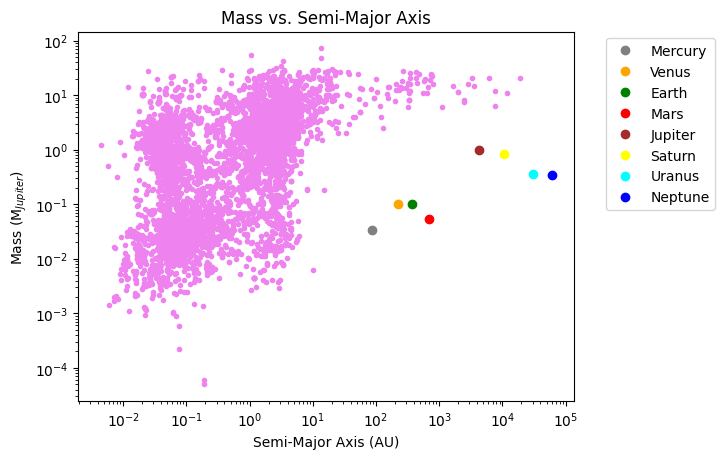

In [ ]:
# Plot mass against semi-major axis
plt.plot(tab['pl_orbsmax'], tab['pl_bmassj'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Jupiter}$)')
plt.title('Mass vs. Semi-Major Axis')

# Plot solar system
for planet, data in ss_planet_data.items():
    plt.plot(data['period'], data['radius'], 'o', color=data['color'], label=planet)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

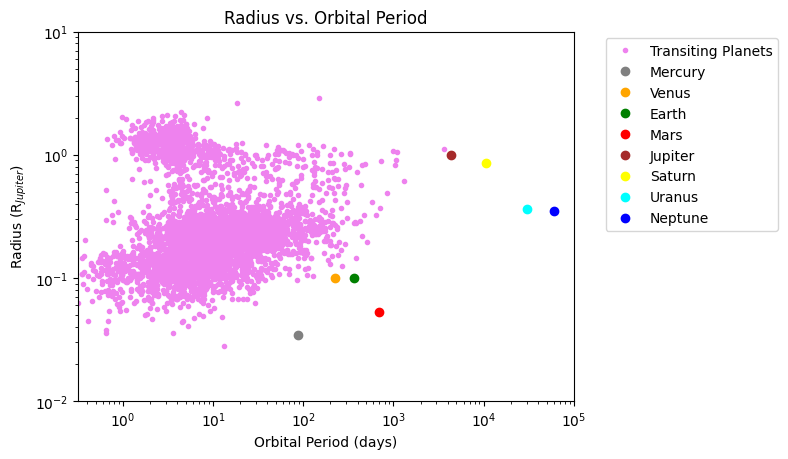

In [ ]:
# Radius against orbital period
plt.plot(tab['pl_orbper'][ind], tab['pl_radj'][ind], '.', color='violet', label='Transiting Planets')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Radius (R$_{Jupiter}$)')
plt.title('Radius vs. Orbital Period')
plt.xlim(10**-0.5, 10**5)
plt.ylim(10**-2, 10**1)

# Plot solar system
for planet, data in ss_planet_data.items():
    plt.plot(data['period'], data['radius'], 'o', color=data['color'], label=planet)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

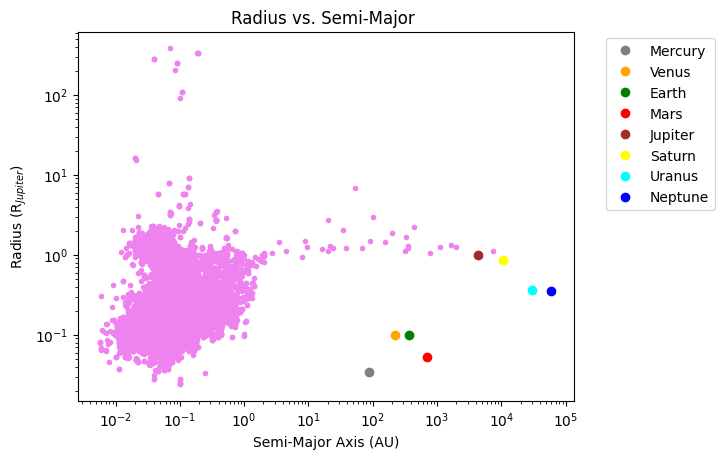

In [ ]:
# Plot radius against semi-major axis
plt.plot(tab['pl_orbsmax'], tab['pl_radj'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Radius (R$_{Jupiter}$)')
plt.title('Radius vs. Semi-Major ')

# Plot solar system
for planet, data in ss_planet_data.items():
    plt.plot(data['period'], data['radius'], 'o', color=data['color'], label=planet)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

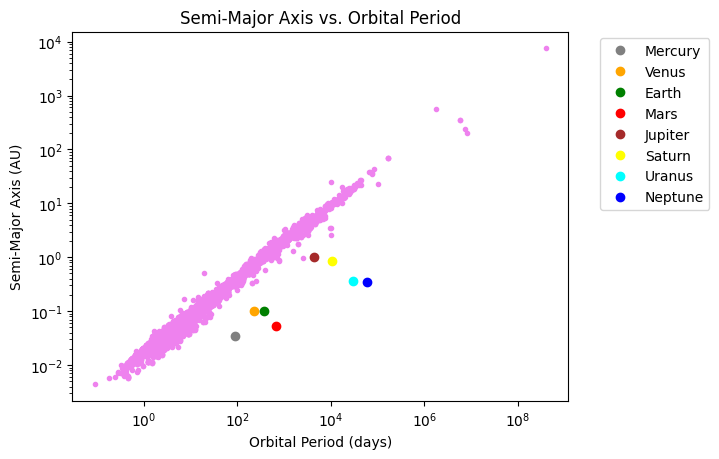

In [ ]:
# Semi-major axis against orbital period
plt.plot(tab['pl_orbper'], tab['pl_orbsmax'], '.', color='violet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Semi-Major Axis (AU)')
plt.title('Semi-Major Axis vs. Orbital Period')

# Plot solar system
for planet, data in ss_planet_data.items():
    plt.plot(data['period'], data['radius'], 'o', color=data['color'], label=planet)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Question 3

In [ ]:
# Print discovery method
print('Discovery method:')
print()
np.unique(tab['discoverymethod'])

Discovery method:



<Column name='discoverymethod' dtype='str29' length=11>
                   Astrometry
              Disk Kinematics
    Eclipse Timing Variations
                      Imaging
                 Microlensing
Orbital Brightness Modulation
                Pulsar Timing
  Pulsation Timing Variations
              Radial Velocity
                      Transit
    Transit Timing Variations

Number of data points: 1096


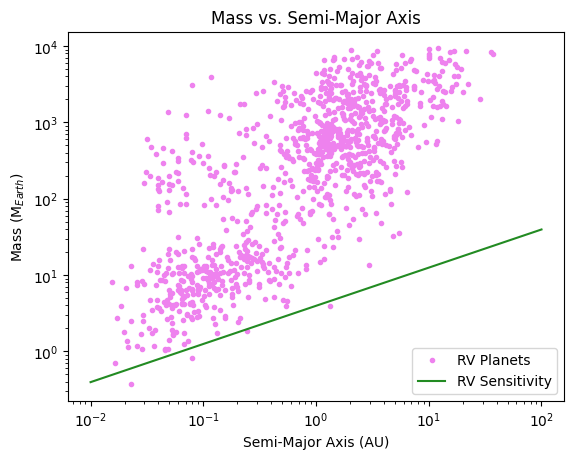

In [ ]:
## Radial Velocity

# Mass sensitivity
sma_arr = 10**(np.arange(5, dtype=float)-2) * u.AU
m_p_arr = 0.5 * u.meter / u.second * 0.5 * u.solMass * np.sqrt(sma_arr / ac.G / (0.5 * u.solMass))

# RV planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Radial Velocity'))
print('Number of data points:', len(ind[0]))

# Plot
plt.plot(tab['pl_orbsmax'][ind], tab['pl_bmasse'][ind], '.', color='violet', label='RV Planets')
plt.plot(sma_arr.value, m_p_arr.decompose().to(u.earthMass), color='forestgreen', label='RV Sensitivity')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Earth}$)')
plt.title('Mass vs. Semi-Major Axis')
plt.legend()
plt.show()

The sensitivity line is basically a threshold. Anything above the line is able to be detected using this method. To go above and beyond, can look into current telescopes/probes and see what their detection method is. Brightness limits, can include the graphs given.

Number of data points: 235


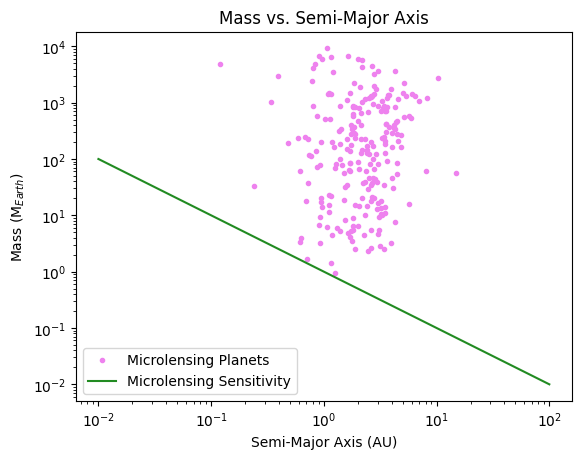

In [ ]:
## Microlensing

# Mass sensitivity for microlensing
m_p_ml_arr = 1 * u.earthMass / sma_arr.value

# Microlensing planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Microlensing'))
print('Number of data points:', len(ind[0]))

# Plot
plt.plot(tab['pl_orbsmax'][ind], tab['pl_bmasse'][ind], '.', color='violet', label='Microlensing Planets')
plt.plot(sma_arr.value, m_p_ml_arr.to(u.earthMass).value, color='forestgreen', label='Microlensing Sensitivity')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Earth}$)')
plt.title('Mass vs. Semi-Major Axis')
plt.legend()
plt.show()

Number of data points: 82


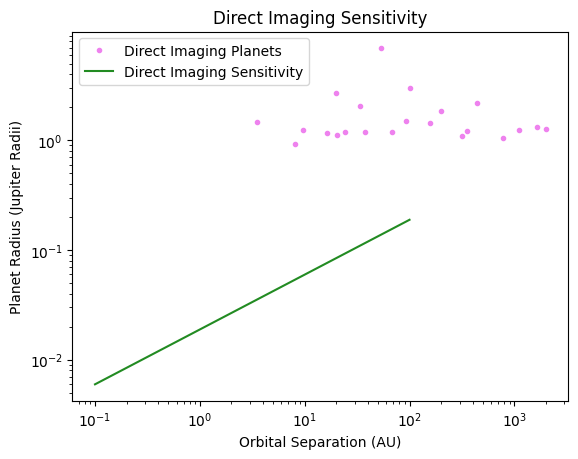

In [ ]:
## Direct Imaging

# Radius senstivity equation
sma_arr = np.logspace(-1, 2, 100) * u.AU
d_system = 100 * u.pc  # distance to the exoplanetary system
lambda_obs = 1 * u.micron  # observing wavelength
D_telescope = 10 * u.m  # telescope diameter
R_star = 1 * u.Rsun  # stellar radius
T_star = 5000 * u.K  # stellar temperature
T_planet = 1000 * u.K  # planet temperature
theta_rad = 1.22 * (lambda_obs / D_telescope)  # calculate diffraction limit
theta = theta_rad.to(u.arcsec, equivalencies=u.dimensionless_angles())  # convert to arcseconds
a_min = (d_system * theta.to(u.radian, equivalencies=u.dimensionless_angles()))  # compute minimum orbital separation in pc
a_min_AU = a_min.to(u.AU, equivalencies=u.dimensionless_angles())
contrast_sensitivity = (sma_arr / a_min_AU)**0.5
h = ac.h  # planck's constant
c = ac.c  # speed of light
k_B = ac.k_B  # boltzmann's constant
# Planck function
def planck_lambda(T):
    exponent = (h * c) / (lambda_obs * k_B * T)
    return (2 * h * c**2) / (lambda_obs**5 * (np.exp(exponent) - 1))
# Compute blackbody flux ratio
B_star = planck_lambda(T_star)
B_planet = planck_lambda(T_planet)
flux_ratio = (B_planet / B_star).decompose().value
r_p_di_arr = np.sqrt(flux_ratio) * R_star.to(u.jupiterRad) * contrast_sensitivity

# Direct imaging planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Imaging'))
print('Number of data points:', len(ind[0]))

# Plot results
plt.plot(tab['pl_orbsmax'][ind], tab['pl_radj'][ind], '.', color='violet', label='Direct Imaging Planets')
plt.plot(sma_arr.value, r_p_di_arr.value, color='forestgreen', label='Direct Imaging Sensitivity')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Separation (AU)')
plt.ylabel('Planet Radius (Jupiter Radii)')
plt.title('Direct Imaging Sensitivity')
plt.legend()
plt.show()

Number of data points: 3


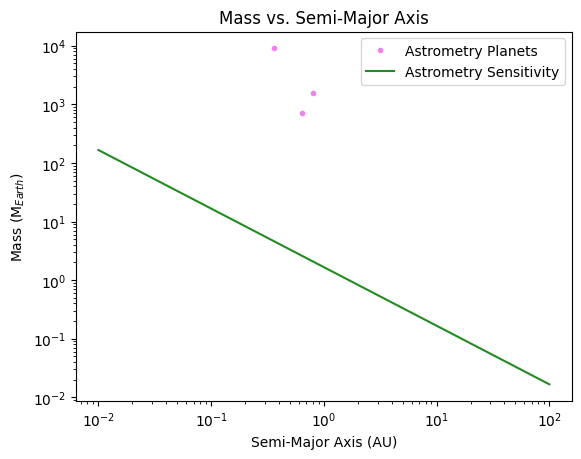

In [ ]:
# Astrometry

# Mass sensitivity equations
delta_theta = 1 * u.microarcsecond  # angular displacement
delta_theta = delta_theta.to(u.radian)
distance = 10 * u.pc  # distance to star
M_star = 0.5 * u.M_sun  # stellar mass
M_p = (delta_theta * distance * M_star / sma_arr).decompose()
m_p_a_arr = M_p.to(u.earthMass, equivalencies=u.dimensionless_angles())

# Astrometry planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Astrometry'))
print('Number of data points:', len(ind[0]))

# Plot
plt.plot(tab['pl_orbsmax'][ind], tab['pl_bmasse'][ind], '.', color='violet', label='Astrometry Planets')
plt.plot(sma_arr.value, m_p_a_arr.to(u.earthMass).value, color='forestgreen', label='Astrometry Sensitivity')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Earth}$)')
plt.title('Mass vs. Semi-Major Axis')
plt.legend()
plt.show()

Number of data points: 1


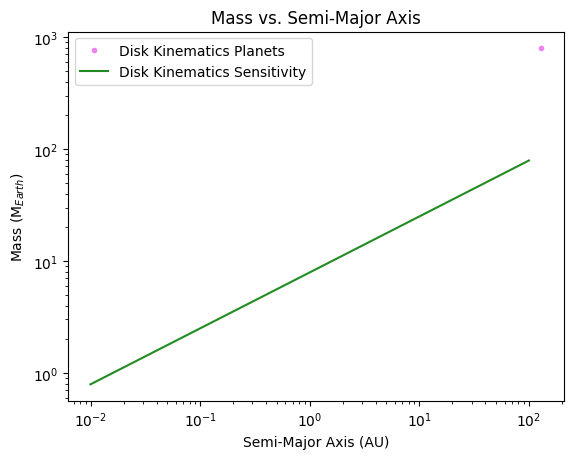

In [ ]:
## Disk Kinematics

# Mass sensitivity equation
delta_v = 1 * u.m / u.s  # state of the art velocity sensitivity
M_star = 0.5 * u.M_sun  # stellar mass
M_p = delta_v * M_star * np.sqrt(sma_arr / (ac.G * M_star)).decompose()
m_p_dk_arr = M_p.to(u.M_earth)

# Disk kinematics planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Disk Kinematics'))
print('Number of data points:', len(ind[0]))

# Plot
plt.plot(tab['pl_orbsmax'][ind], tab['pl_bmasse'][ind], '.', color='violet', label='Disk Kinematics Planets')
plt.plot(sma_arr.value, m_p_dk_arr.to(u.earthMass).value, color='forestgreen', label='Disk Kinematics Sensitivity')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Earth}$)')
plt.title('Mass vs. Semi-Major Axis')
plt.legend()
plt.show()

Number of data points: 0


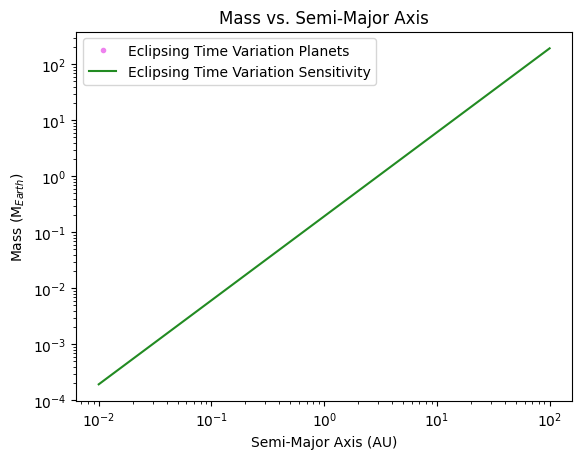

In [ ]:
## Eclipsing Time Variations

# Mass sensitivity equation
delta_t = 1 * u.second  # timing precision
P_binary = (10 * u.day).to(u.second)  # binary period
m_p_etv_arr = ( delta_t / P_binary * M_star * (sma_arr / (1*u.AU))**(3/2) ).decompose().to(u.earthMass)

# Eclipsing time variation planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Eclipsing Time Variations'))
print('Number of data points:', len(ind[0]))

# Plot
plt.plot(tab['pl_orbsmax'][ind], tab['pl_bmasse'][ind], '.', color='violet', label='Eclipsing Time Variation Planets')
plt.plot(sma_arr.value, m_p_etv_arr.to(u.earthMass).value, color='forestgreen', label='Eclipsing Time Variation Sensitivity')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Earth}$)')
plt.title('Mass vs. Semi-Major Axis')
plt.legend()
plt.show()

Number of data points: 9


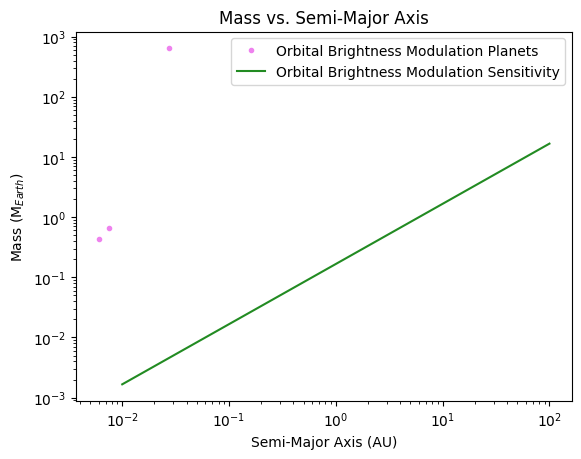

In [ ]:
## Orbital Brightness Modulation

# Mass sensitivity equation
F_obs = 1e-6  # observed flux variation
m_p_obm_arr = (F_obs * M_star * sma_arr / u.AU).decompose().to(u.earthMass)

# Orbital brightness modulation planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Orbital Brightness Modulation'))
print('Number of data points:', len(ind[0]))

# Plot
plt.plot(tab['pl_orbsmax'][ind], tab['pl_bmasse'][ind], '.', color='violet', label='Orbital Brightness Modulation Planets')
plt.plot(sma_arr.value, m_p_obm_arr.value, color='forestgreen', label='Orbital Brightness Modulation Sensitivity')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Earth}$)')
plt.title('Mass vs. Semi-Major Axis')
plt.legend()
plt.show()

Number of data points: 8


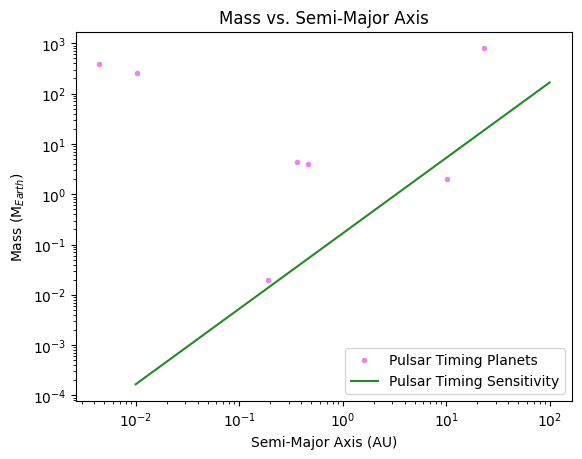

In [ ]:
## Pulsar Timing

# Mass sensitivity
delta_t = 1 * u.microsecond  # timing precision
delta_t = delta_t.to(u.second)
P_pulse = 1 * u.second  # Pulsar period
m_p_pt_arr = (delta_t / P_pulse * M_star * (sma_arr / (1 * u.AU))**(3/2)).decompose().to(u.earthMass)

# Pulsar timing planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Pulsar Timing'))
print('Number of data points:', len(ind[0]))

# Plot
plt.plot(tab['pl_orbsmax'][ind], tab['pl_bmasse'][ind], '.', color='violet', label='Pulsar Timing Planets')
plt.plot(sma_arr.value, m_p_pt_arr.to(u.earthMass).value, color='forestgreen', label='Pulsar Timing Sensitivity')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Earth}$)')
plt.title('Mass vs. Semi-Major Axis')
plt.legend()
plt.show()

Number of data points: 33


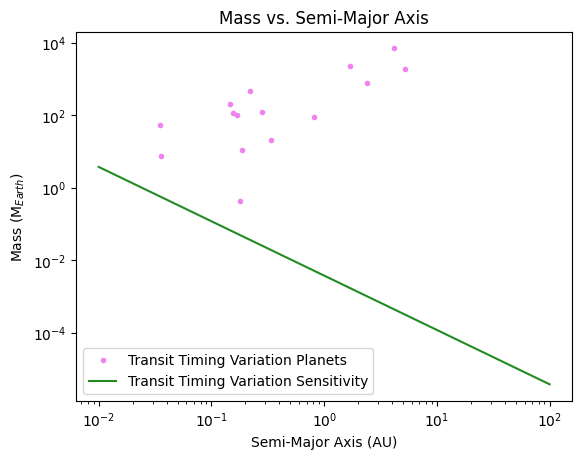

In [ ]:
## Transit Timing Variations

# Mass sensitivity equation
delta_t = 1 * u.second  # transit timing deviation
M_star = 0.5 * u.solMass  # stellar mass
P_transit = np.sqrt((4 * np.pi**2 * sma_arr**3) / (G * M_star))  # orbital period in seconds
m_p_ttv_arr = (delta_t / P_transit * M_star).to(u.earthMass)

# Transit timing variation planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Transit Timing Variations'))
print('Number of data points:', len(ind[0]))

# Plot
plt.plot(tab['pl_orbsmax'][ind], tab['pl_bmasse'][ind], '.', color='violet', label='Transit Timing Variation Planets')
plt.plot(sma_arr.value, m_p_ttv_arr.to(u.earthMass).value, color='forestgreen', label='Transit Timing Variation Sensitivity')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Earth}$)')
plt.title('Mass vs. Semi-Major Axis')
plt.legend()
plt.show()

Number of data points: 2


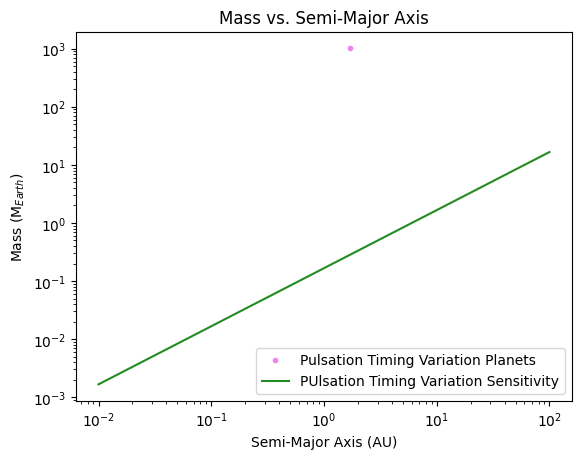

In [ ]:
## Pulsation Timing Variations

# Mass sensitivity equation
delta_t = 1e-6 * u.second  # pulse period variation
m_p_ptv_arr = ((delta_t / P_pulse * M_star * (sma_arr / u.AU)) * u.dimensionless_unscaled).decompose().to(u.earthMass)

# Transit timing variation planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Pulsation Timing Variations'))
print('Number of data points:', len(ind[0]))

# Plot
plt.plot(tab['pl_orbsmax'][ind], tab['pl_bmasse'][ind], '.', color='violet', label='Pulsation Timing Variation Planets')
plt.plot(sma_arr.value, m_p_ptv_arr.to(u.earthMass).value, color='forestgreen', label='PUlsation Timing Variation Sensitivity')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Earth}$)')
plt.title('Mass vs. Semi-Major Axis')
plt.legend()
plt.show()

A temperate Earth-like planet around a Sun-like star

Number of data points: 1096


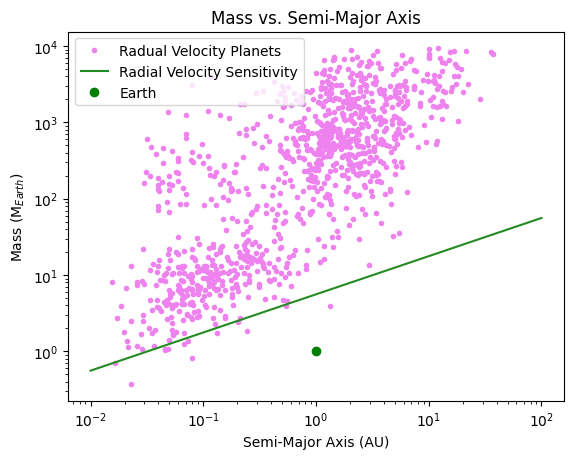

In [ ]:
## Radial Velocity

# Mass sensitivity
sma_arr = 10**(np.arange(5, dtype=float)-2) * u.AU
m_p_arr = 0.5 * u.meter / u.second * u.solMass * np.sqrt(sma_arr / ac.G / (u.solMass))

# RV planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Radial Velocity'))
print('Number of data points:', len(ind[0]))

# Earth-like planet around a Sun-like star
earth_mass = 1 * u.earthMass
earth_sma = 1 * u.AU

# Plot
plt.plot(tab['pl_orbsmax'][ind], tab['pl_bmasse'][ind], '.', color='violet', label='Radual Velocity Planets')
plt.plot(sma_arr.value, m_p_arr.decompose().to(u.earthMass), color='forestgreen', label='Radial Velocity Sensitivity')
plt.plot(earth_sma.value, earth_mass.value, 'o', color='green', label='Earth')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Earth}$)')
plt.title('Mass vs. Semi-Major Axis')
plt.legend(loc='upper left')
plt.show()

Number of data points: 235


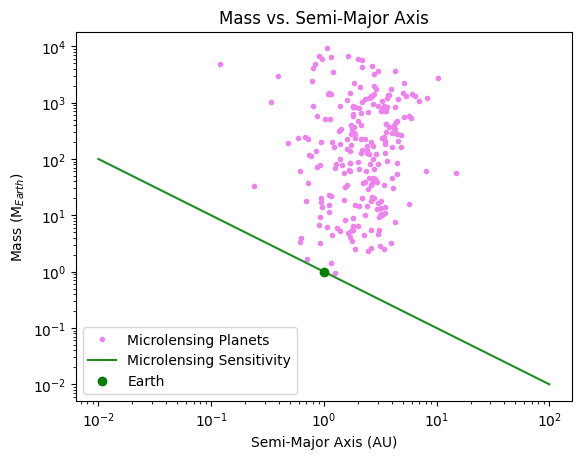

In [ ]:
## Microlensing

# Mass sensitivity for microlensing
m_p_ml_arr = 1 * u.earthMass / sma_arr.value

# Microlensing planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Microlensing'))
print('Number of data points:', len(ind[0]))

# Plot
plt.plot(tab['pl_orbsmax'][ind], tab['pl_bmasse'][ind], '.', color='violet', label='Microlensing Planets')
plt.plot(sma_arr.value, m_p_ml_arr.to(u.earthMass).value, color='forestgreen', label='Microlensing Sensitivity')
plt.plot(earth_sma.value, earth_mass.value, 'o', color='green', label='Earth')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Earth}$)')
plt.title('Mass vs. Semi-Major Axis')
plt.legend()
plt.show()

Number of data points: 82


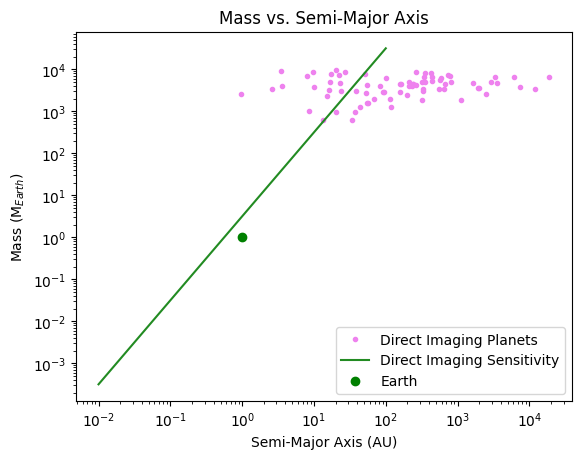

In [ ]:
## Direct Imaging

# Mass sensitivity
m_p_di_arr = (sma_arr / (10 * u.AU))**2 * u.jupiterMass

# Direct imaging planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Imaging'))
print('Number of data points:', len(ind[0]))

# Plot
plt.plot(tab['pl_orbsmax'][ind], tab['pl_bmasse'][ind], '.', color='violet', label='Direct Imaging Planets')
plt.plot(sma_arr.value, m_p_di_arr.to(u.earthMass).value, color='forestgreen', label='Direct Imaging Sensitivity')
plt.plot(earth_sma.value, earth_mass.value, 'o', color='green', label='Earth')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Earth}$)')
plt.title('Mass vs. Semi-Major Axis')
plt.legend()
plt.show()

Number of data points: 3


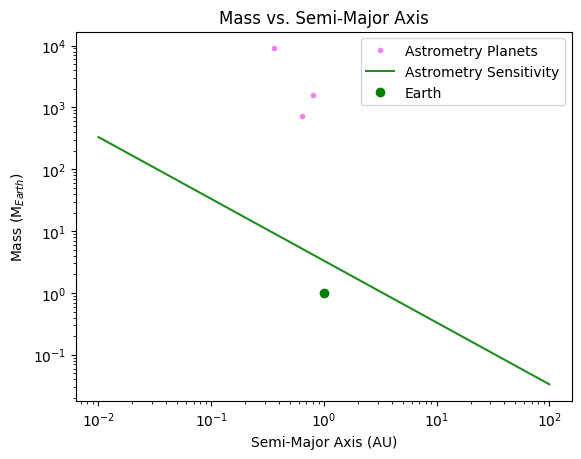

In [ ]:
# Astrometry

# Mass sensitivity equations
delta_theta = 1 * u.microarcsecond  # angular displacement
delta_theta = delta_theta.to(u.radian)
distance = 10 * u.pc  # distance to star
M_star = u.M_sun  # stellar mass
M_p = (delta_theta * distance * M_star / sma_arr).decompose()
m_p_a_arr = M_p.to(u.earthMass, equivalencies=u.dimensionless_angles())

# Astrometry planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Astrometry'))
print('Number of data points:', len(ind[0]))

# Plot
plt.plot(tab['pl_orbsmax'][ind], tab['pl_bmasse'][ind], '.', color='violet', label='Astrometry Planets')
plt.plot(sma_arr.value, m_p_a_arr.to(u.earthMass).value, color='forestgreen', label='Astrometry Sensitivity')
plt.plot(earth_sma.value, earth_mass.value, 'o', color='green', label='Earth')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Earth}$)')
plt.title('Mass vs. Semi-Major Axis')
plt.legend()
plt.show()

Number of data points: 1


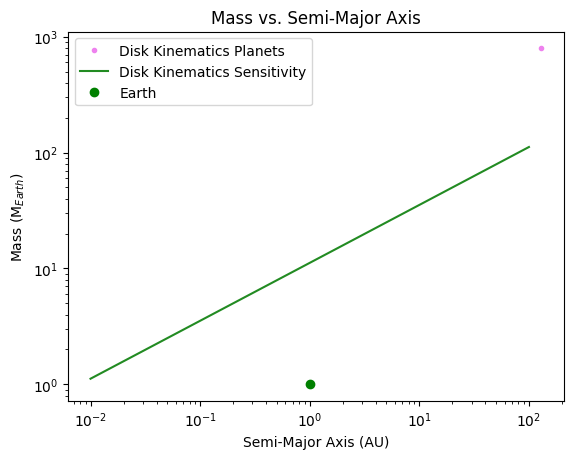

In [ ]:
## Disk Kinematics

# Mass sensitivity equation
delta_v = 1 * u.m / u.s  # state of the art velocity sensitivity
M_star = u.M_sun  # stellar mass
M_p = delta_v * M_star * np.sqrt(sma_arr / (ac.G * M_star)).decompose()
m_p_dk_arr = M_p.to(u.M_earth)

# Disk kinematics planets
ind = np.where((tab['default_flag'] == 1) & (tab['discoverymethod'] == 'Disk Kinematics'))
print('Number of data points:', len(ind[0]))

# Plot
plt.plot(tab['pl_orbsmax'][ind], tab['pl_bmasse'][ind], '.', color='violet', label='Disk Kinematics Planets')
plt.plot(sma_arr.value, m_p_dk_arr.to(u.earthMass).value, color='forestgreen', label='Disk Kinematics Sensitivity')
plt.plot(earth_sma.value, earth_mass.value, 'o', color='green', label='Earth')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Mass (M$_{Earth}$)')
plt.title('Mass vs. Semi-Major Axis')
plt.legend()
plt.show()